In [19]:
train_time = 1
param_num = 450340
local_data_num = 8
comm_bandwidth = 10 * 1024**2 /8  # k * 1024**2 /8 => k Mb/s 
comm_time = param_num * 4 / comm_bandwidth
fwdgrad_time_per_round = train_time*local_data_num + comm_time*local_data_num
fedsgd_time_per_round = train_time*8*local_data_num + comm_time*local_data_num*2
fedavg_time_per_round = train_time*8*local_data_num + comm_time*1*2
fwdgrad_time_per_round /= 60
fedsgd_time_per_round /= 60
fedavg_time_per_round /= 60
method_round_time = [fedavg_time_per_round,fedsgd_time_per_round,fwdgrad_time_per_round,fwdgrad_time_per_round]
dataset = "mnist"

In [20]:
train_time, fedsgd_time_per_round

(1, 1.433154296875)

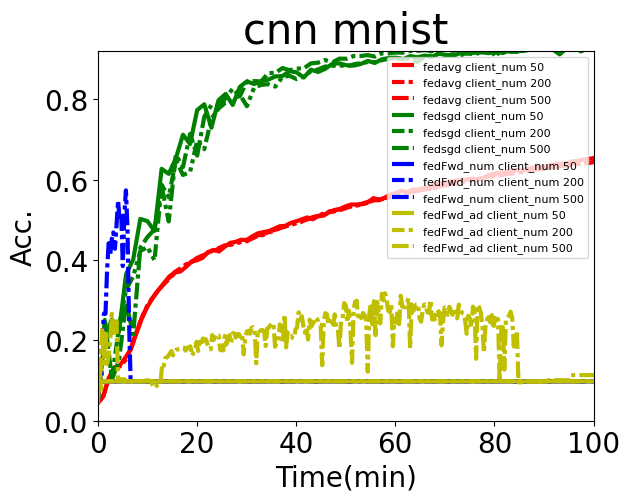

In [21]:
import matplotlib.pyplot as plt
import numpy as np

linestyle = [(0, ( )), (0, (3, 1,1,1,1,1)), (0, (4, 1,1,1)), (0, (1, 1)),(0, (2, 4)), (0, (5, 1)),(0,(3,1,3,1)),(0,(4,3,3,1))]
colors=['r','g','b','y','c','m','k',"tan"] * 100
lw = 3
client_num_list = [50,200,500]
method_list = ["fedavg","fedsgd","fedFwd_num","fedFwd_ad"]
model_list = ["cnn"]
# normal_method_list = ["kaiming_normal", "xavier_normal"]
learning_rate_list = ["0.01"]
eval_frequence = 1
for model in model_list:
    # for method in normal_method_list:
    # k = 1
    # plt.figure(figsize=(30, 6),dpi=100)
    for method_id,method in enumerate(method_list):
        acc_lists = []
        for i,client_num in enumerate(client_num_list):
            acc = []
            file = f"{method}_{model}_{dataset}_lr0.01_client_num_{client_num}.log"
            if method=="fedFwd_num":
                file = f"fedFwd_{model}_{dataset}_lr0.01_client_num_{client_num}_numerical.log"
            elif method=="fedFwd_ad":
                file = f"fedFwd_{model}_{dataset}_lr0.01_client_num_{client_num}_AD.log"
            with open(file,"r") as ff:
                log = ff.readlines()
                for l in log:
                    if "'acc':" in l:
                        acc.append(float(l[l.rfind("'acc':")+7:l.rfind(",")]))
                    # if len(acc)>200:
                    #     break
            plt.plot([t*method_round_time[method_id]*eval_frequence for t in range(len(acc))], acc, linestyle=linestyle[i], color=colors[method_id],label=f"{method} client_num {client_num}",linewidth=lw)

        plt.xlabel("Time(min)",fontsize=20)
        plt.ylabel("Acc.",fontsize=20)
        plt.xticks(size = 20)
        plt.xlim(0,100)
        plt.yticks(size = 20)
        plt.ylim(0,0.92)
        plt.legend(fontsize=8)
        plt.title(f"{model} {dataset}",fontsize=30)
    plt.show()
        # plt.savefig(f"./{model}_{method}.pdf")


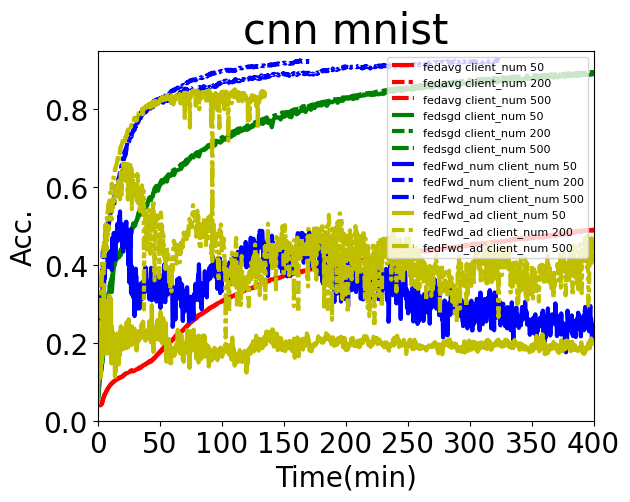

In [25]:
import matplotlib.pyplot as plt
import numpy as np

linestyle = [(0, ( )), (0, (3, 1,1,1,1,1)), (0, (4, 1,1,1)), (0, (1, 1)),(0, (2, 4)), (0, (5, 1)),(0,(3,1,3,1)),(0,(4,3,3,1))]
colors=['r','g','b','y','c','m','k',"tan"] * 100
lw = 3
client_num_list = [50,200,500]
method_list = ["fedavg","fedsgd","fedFwd_num","fedFwd_ad"]
model_list = ["cnn"]
# normal_method_list = ["kaiming_normal", "xavier_normal"]
learning_rate_list = ["0.01"]
eval_frequence = 1
lr = 0.001
for model in model_list:
    # for method in normal_method_list:
    # k = 1
    # plt.figure(figsize=(30, 6),dpi=100)
    for method_id,method in enumerate(method_list):
        acc_lists = []
        for i,client_num in enumerate(client_num_list):
            acc = []
            file = f"{method}_{model}_{dataset}_lr{lr}_client_num_{client_num}.log"
            if method=="fedFwd_num":
                file = f"fedFwd_{model}_{dataset}_lr{lr}_client_num_{client_num}_numerical.log"
            elif method=="fedFwd_ad":
                file = f"fedFwd_{model}_{dataset}_lr{lr}_client_num_{client_num}_AD.log"
            with open(file,"r") as ff:
                log = ff.readlines()
                for l in log:
                    if "'acc':" in l:
                        acc.append(float(l[l.rfind("'acc':")+7:l.rfind(",")]))
                    # if len(acc)>200:
                    #     break
            plt.plot([t*method_round_time[method_id]*eval_frequence for t in range(len(acc))], acc, linestyle=linestyle[i], color=colors[method_id],label=f"{method} client_num {client_num}",linewidth=lw)

        plt.xlabel("Time(min)",fontsize=20)
        plt.ylabel("Acc.",fontsize=20)
        plt.xticks(size = 20)
        plt.xlim(0,400)
        plt.yticks(size = 20)
        plt.ylim(0,0.95)
        plt.legend(fontsize=8)
        plt.title(f"{model} {dataset}",fontsize=30)
    plt.show()
        # plt.savefig(f"./{model}_{method}.pdf")


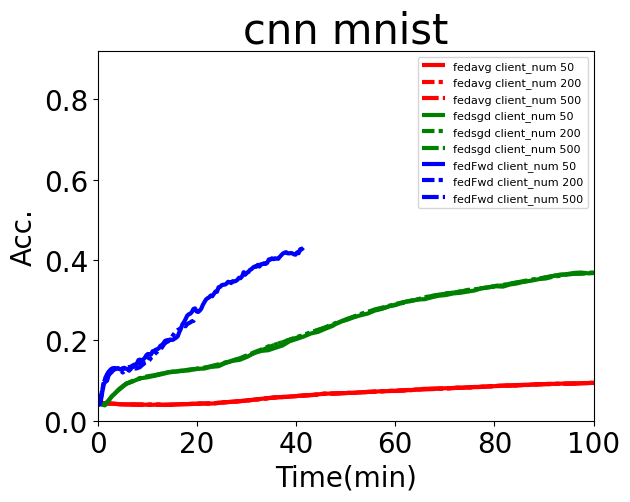

In [23]:
import matplotlib.pyplot as plt
import numpy as np

linestyle = [(0, ( )), (0, (3, 1,1,1,1,1)), (0, (4, 1,1,1)), (0, (1, 1)),(0, (2, 4)), (0, (5, 1)),(0,(3,1,3,1)),(0,(4,3,3,1))]
colors=['r','g','b','y','c','m','k',"tan"] * 100
lw = 3
client_num_list = [50,200,500]
method_list = ["fedavg","fedsgd","fedFwd"]
model_list = ["cnn"]
# normal_method_list = ["kaiming_normal", "xavier_normal"]
learning_rate_list = ["0.01"]
eval_frequence = 1
for model in model_list:
    # for method in normal_method_list:
    # k = 1
    # plt.figure(figsize=(30, 6),dpi=100)
    for method_id,method in enumerate(method_list):
        acc_lists = []
        for i,client_num in enumerate(client_num_list):
            acc = []
            file = f"{method}_{model}_{dataset}_lr0.0001_client_num_{client_num}.log"
            if method=="fedFwd":
                file = f"{method}_{model}_{dataset}_lr0.0001_client_num_{client_num}_numerical.log"
            with open(file,"r") as ff:
                log = ff.readlines()
                for l in log:
                    if "'acc':" in l:
                        acc.append(float(l[l.rfind("'acc':")+7:l.rfind(",")]))
                    # if len(acc)>200:
                    #     break
            plt.plot([t*method_round_time[method_id]*eval_frequence for t in range(len(acc))], acc, linestyle=linestyle[i], color=colors[method_id],label=f"{method} client_num {client_num}",linewidth=lw)

        plt.xlabel("Time(min)",fontsize=20)
        plt.ylabel("Acc.",fontsize=20)
        plt.xticks(size = 20)
        plt.xlim(0,100)
        plt.yticks(size = 20)
        plt.ylim(0,0.92)
        plt.legend(fontsize=8)
        plt.title(f"{model} {dataset}",fontsize=30)
    plt.show()
        # plt.savefig(f"./{model}_{method}.pdf")


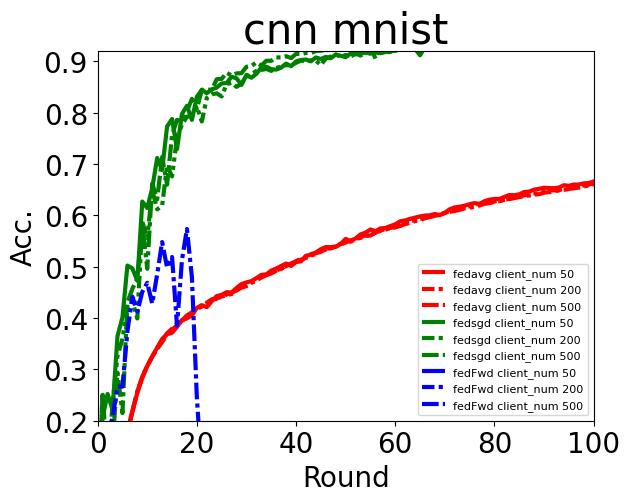

In [24]:
import matplotlib.pyplot as plt
import numpy as np

linestyle = [(0, ( )), (0, (3, 1,1,1,1,1)), (0, (4, 1,1,1)), (0, (1, 1)),(0, (2, 4)), (0, (5, 1)),(0,(3,1,3,1)),(0,(4,3,3,1))]
colors=['r','g','b','y','c','m','k',"tan"] * 100
lw = 3
client_num_list = [50,200,500]
method_list = ["fedavg","fedsgd","fedFwd"]
model_list = ["cnn"]
# normal_method_list = ["kaiming_normal", "xavier_normal"]
learning_rate_list = ["0.01"]
eval_frequence = 1
for model in model_list:
    # for method in normal_method_list:
    # k = 1
    # plt.figure(figsize=(30, 6),dpi=100)
    for method_id,method in enumerate(method_list):
        acc_lists = []
        for i,client_num in enumerate(client_num_list):
            acc = []
            file = f"{method}_{model}_{dataset}_lr0.01_client_num_{client_num}.log"
            if method=="fedFwd":
                file = f"{method}_{model}_{dataset}_lr0.01_client_num_{client_num}_numerical.log"
            with open(file,"r") as ff:
                log = ff.readlines()
                for l in log:
                    if "'acc':" in l:
                        acc.append(float(l[l.rfind("'acc':")+7:l.rfind(",")]))
                    # if len(acc)>200:
                    #     break
            plt.plot([t*eval_frequence for t in range(len(acc))], acc, linestyle=linestyle[i], color=colors[method_id],label=f"{method} client_num {client_num}",linewidth=lw)

        plt.xlabel("Round",fontsize=20)
        plt.ylabel("Acc.",fontsize=20)
        plt.xticks(size = 20)
        plt.xlim(0,100)
        plt.yticks(size = 20)
        plt.ylim(0.2,0.92)
        plt.legend(fontsize=8)
        plt.title(f"{model} {dataset}",fontsize=30)
    plt.show()
        # plt.savefig(f"./{model}_{method}.pdf")
